In [32]:
#Import Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import random
import scipy.stats as sts
import gmaps 
from scipy.stats import linregress
from yelpapi import YelpAPI
from pprint import pprint
from config import gkey
from config import yelp_api_key
 
os.chdir('Resources')
results = pd.DataFrame([])
 
for counter, file in enumerate(glob.glob("bls_qcew_maps_excel-*")):
    namedf = pd.read_csv(file, skiprows=3)
    results = results.append(namedf)
 
results.to_csv('combinedfile.csv')



FileNotFoundError: [Errno 2] No such file or directory: 'Resources'

In [3]:
#Format DataFrame
CountyIncome = pd.read_csv('combinedfile.csv')
CountyIncome = CountyIncome.rename(columns = {'USPS':'State', 
                                             'Area Name': 'County'})
#CountyIncome=CountyIncome.set_index('State')
CountyIncome = CountyIncome.drop(columns=['Unnamed: 0','FIPS', 'Quarter', 'Industry'])
CountyIncome.head()





,County,Year,No Of Establishments,Employment,One-Year Employment Gain/Loss (Percent),Average Weekly Wages,On-Year Weekly Wages Gain/Loss (Percent),State
0,Allegany County,2019.0,1564.0,29113.0,0.3,751.0,2.6,MD
1,Anne Arundel County,2019.0,15384.0,270523.0,0.3,1194.0,3.2,MD
2,Baltimore County,2019.0,21389.0,378706.0,0.5,1122.0,1.2,MD
3,Calvert County,2019.0,1886.0,22805.0,-0.3,988.0,-0.3,MD
4,Caroline County,2019.0,687.0,9993.0,2.4,831.0,4.8,MD


In [28]:
#Add Coordinates to Data Frame
coordinates = pd.read_csv("../Coordinates/county_coordinates.csv")
coordinates = coordinates.drop(columns=["USPS", "GEOID"])
CountyIncome = CountyIncome.merge(coordinates, left_index=False)
CountyIncome.head()

,County,Year,No Of Establishments,Employment,One-Year Employment Gain/Loss (Percent),Average Weekly Wages,On-Year Weekly Wages Gain/Loss (Percent),State,ANSICODE,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,Latitude,Longitude
0,Allegany County,2019.0,1564.0,29113.0,0.3,751.0,2.6,MD,1713506,1.093458e+09,14805576,422.186,5.716,39.612313,-78.703104
1,Allegany County,2019.0,919.0,13174.0,-1.7,741.0,1.2,NY,1713506,1.093458e+09,14805576,422.186,5.716,39.612313,-78.703104
2,Allegany County,2019.0,1564.0,29113.0,0.3,751.0,2.6,MD,974100,2.666030e+09,12999275,1029.360,5.019,42.247853,-78.026153
3,Allegany County,2019.0,919.0,13174.0,-1.7,741.0,1.2,NY,974100,2.666030e+09,12999275,1029.360,5.019,42.247853,-78.026153
4,Anne Arundel County,2019.0,15384.0,270523.0,0.3,1194.0,3.2,MD,1710958,1.074287e+09,448099595,414.785,173.012,38.991610,-76.560731


In [29]:
#Add Column and State Data Frame
CountyIncome_randomdf = CountyIncome.sample(n = 100) 
CountyIncome_randomdf['County and State'] = (CountyIncome_randomdf["County"] + ", " + CountyIncome_randomdf["State"])
CountyIncome_randomdf.head()



,County,Year,No Of Establishments,Employment,One-Year Employment Gain/Loss (Percent),Average Weekly Wages,On-Year Weekly Wages Gain/Loss (Percent),State,ANSICODE,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,Latitude,Longitude,County and State
5293,Lincoln County,2019.0,1985.0,18100.0,0.2,729.0,1.4,OR,1605076,1.055507e+10,49947393,4075.337,19.285,42.229993,-110.682961,"Lincoln County, OR"
14362,San Bernardino County,2019.0,62055.0,760661.0,2.2,931.0,3.3,CA,277300,5.195490e+10,117095140,20059.898,45.211,34.857220,-116.181197,"San Bernardino County, CA"
6831,Union County,2019.0,336.0,5069.0,4.8,917.0,7.4,KY,306913,6.308069e+08,16049423,243.556,6.197,30.054280,-82.366918,"Union County, KY"
4256,Jefferson County,2019.0,787.0,7682.0,0.3,770.0,0.5,IA,1155132,4.615975e+09,26213927,1782.238,10.121,44.645151,-121.178632,"Jefferson County, IA"
6171,Monroe County,2019.0,2127.0,38964.0,-2.7,1036.0,4.0,MI,343073,1.025872e+09,5643844,396.092,2.179,33.017435,-83.922938,"Monroe County, MI"


In [5]:
#Search Through Yelp API for Fast Food Restaurants in Counties
yelp_api = YelpAPI(yelp_api_key)
total_fastfood = []
for county in CountyIncome_randomdf['County and State']:
    
    search_results = yelp_api.search_query(term = 'fast food', location = county)
    total_fastfood.append(search_results['total'])
    
len(total_fastfood)
print(total_fastfood)

[70, 1, 332, 1900, 627, 200, 117, 192, 755, 65, 346, 57, 1600, 325, 19, 517, 258, 779, 107, 45, 4500, 2000, 502, 217, 182, 414, 177, 155, 299, 316, 281, 74, 262, 21, 290, 453, 1300, 405, 0, 23, 18, 458, 310, 17, 767, 806, 1100, 123, 255, 14, 39, 660, 1700, 127, 952, 4100, 0, 459, 217, 135, 156, 142, 80, 1500, 154, 31, 160, 1200, 46, 39, 60, 24, 781, 691, 452, 15, 1700, 405, 20, 42, 770, 665, 33, 220, 4, 6, 1800, 297, 146, 1400, 390, 200, 6, 1200, 56, 97, 47, 55, 158, 4]


In [7]:
County_and_State = CountyIncome_randomdf['County and State']
Average_Weekly_Wages = CountyIncome_randomdf['Average Weekly Wages']

In [8]:
#Format DataFrame
County_FastFood_df = pd.DataFrame({"Counties" : County_and_State, "Total Fast Food Restaurants" : total_fastfood, 'Average Weekly Wages' : Average_Weekly_Wages })
County_FastFood_df.head()

,Counties,Total Fast Food Restaurants,Average Weekly Wages
961,"Bourbon County, KS",70,714.0
3158,"Rock County, NE",1,750.0
2792,"Skagit County, WA",332,1008.0
2051,"Kendall County, TX",1900,950.0
250,"Terrebonne Parish, LA",627,974.0


In [9]:
#Set Index to Search Through Counties
County_FastFood_df_indexed = County_FastFood_df.set_index('Counties')

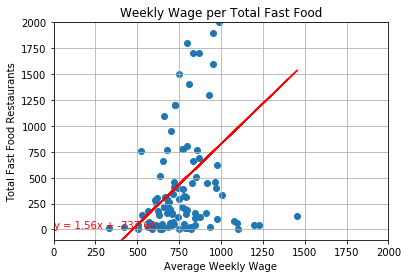

The correlation coefficient between Average Weekly Wages and Total Fast Food Restaurants is 0.39
The P-Value between Average Weekly Wages and Total Fast Food Restaurants is 0.0


AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

In [10]:
#Scatter Plot and Linear Regression of Average Weekly Wages and Total Fast Food Restaurants
x_axis = County_FastFood_df["Average Weekly Wages"]
y_axis = County_FastFood_df["Total Fast Food Restaurants"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=10,color="red")
plt.title("Weekly Wage per Total Fast Food")
plt.xlabel("Average Weekly Wage")
plt.ylabel("Total Fast Food Restaurants")
plt.xlim(0, 2000)
plt.ylim(-100, 2000)
plt.grid(True)
plt.show()

import scipy.stats as st
AWW = County_FastFood_df_indexed['Average Weekly Wages']
TotalFastFood = County_FastFood_df_indexed['Total Fast Food Restaurants']

print(f"The correlation coefficient between Average Weekly Wages and Total Fast Food Restaurants is {round(st.pearsonr(AWW,TotalFastFood)[0],2)}")
print(f"The P-Value between Average Weekly Wages and Total Fast Food Restaurants is {round(st.pearsonr(AWW,TotalFastFood)[1],2)}")
plt.save

Text(0.5, 1.0, 'Weekly Wages per County and State')

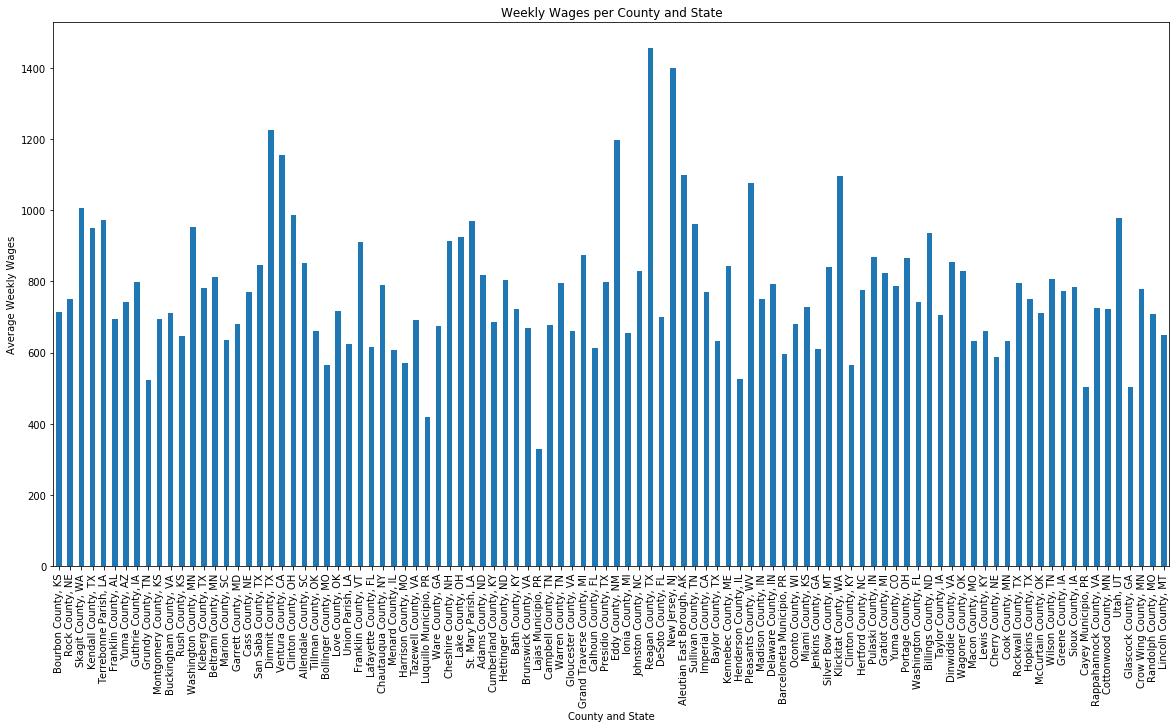

In [11]:
#Bar Chart of Total Restaurants in Counties
County_FastFood_df_indexed["Average Weekly Wages"].plot(kind="bar", figsize=(20,10))
plt.xlabel("County and State")
plt.ylabel("Average Weekly Wages")
plt.title("Weekly Wages per County and State")


In [12]:
#Find Potential Outliers
Average_Weekly_Wages =County_FastFood_df_indexed['Average Weekly Wages'].astype(int)

quartiles = County_FastFood_df_indexed["Average Weekly Wages"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 662.0
The upper quartile of temperatures is: 847.25
The interquartile range of temperatures is: 185.25
The the median of temperatures is: 751.0 
Values below 384.125 could be outliers.
Values above 1125.125 could be outliers.


In [13]:
outlier_ff = County_FastFood_df_indexed.loc[(Average_Weekly_Wages < lower_bound) | (Average_Weekly_Wages > upper_bound)]
outlier_ff

,Total Fast Food Restaurants,Average Weekly Wages
Counties,,
"Dimmit County, TX",45,1225.0
"Ventura County, CA",4500,1157.0
"Lajas Municipio, PR",17,329.0
"Eddy County, NM",39,1198.0
"Reagan County, TX",127,1456.0
"New Jersey, NJ",4100,1399.0


In [31]:
#Heat Map on NUmber of Fast Food Restaurants and Counties
gmaps.configure(api_key=gkey)
locations = CountyIncome_randomdf[["Latitude", "Longitude"]].astype(float)
total_restaurants = CountyIncome_randomdf["No Of Establishments"].astype(float)
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=total_restaurants, dissipating=False, max_intensity=65,
                                point_radius = 0.5)
fig.add_layer(heat_layer)
fig
#fig.savefig("county_heatmap.png")

Figure(layout=FigureLayout(height='420px'))